<a href="https://colab.research.google.com/github/abdullahkiani007/NeuralNet/blob/main/FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F

In [3]:
train = datasets.MNIST(
    '',
    train = True,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
)
test = datasets.MNIST(
    '',
    train = False,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 55353981.48it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1629986.33it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14057461.28it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4217517.99it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
train_set = torch.utils.data.DataLoader(train,batch_size = 10 , shuffle=True) # wrap the iterator over training dataset to iterate
test_set = torch.utils.data.DataLoader(test,batch_size = 10 , shuffle=True)

In [27]:
for data in train_set:
  X,y = data
  print(y)
  break;

tensor([8, 0, 3, 9, 7, 8, 1, 9, 5, 0])


tensor(8)


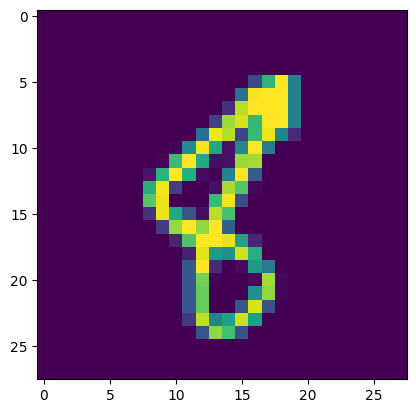

In [29]:
import matplotlib.pyplot as plt
x,y = data[0][0] , data[1][0]


plt.imshow(x[0])
print(y)

In [6]:
Xs , ys = data

print(Xs.shape)

torch.Size([10, 1, 28, 28])


In [7]:
count = 0
dic = {}
for data in train_set: # data = one batch
  Xs , ys = data  # Xs = representation of num ys = num
  for y in ys:
    y = int(y)
    if y in dic.keys():
      dic[y] = dic[y] +1
    else:
      dic[y] = 1


print(dic)


{2: 5958, 5: 5421, 0: 5923, 1: 6742, 6: 5918, 8: 5851, 7: 6265, 9: 5949, 3: 6131, 4: 5842}


In [2]:


train = datasets.MNIST(
    '',
    train = True,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
)
test = datasets.MNIST(
    '',
    train = False,
    download = True,
    transform = transforms.Compose([transforms.ToTensor()])
)

train_set = torch.utils.data.DataLoader(train,batch_size = 10 , shuffle=True) # wrap the iterator over training dataset to iterate
test_set = torch.utils.data.DataLoader(test,batch_size = 10 , shuffle=True)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 19870057.66it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 668648.44it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5516604.63it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3818506.47it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [5]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28 , 64) # input layer  (inputsize , outputsize)
    self.fc2 = nn.Linear(64, 64)  # hidden layer
    self.fc3 = nn.Linear(64 , 64) # hidden layer
    self.fc4 = nn.Linear(64 , 10) # output layer

  def forward(self,x): # forward propogation x -> input
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x,dim=1)


t = torch.ones([28,28])
# transform the original tensor and flattens it
# -1 means it could be any batch size
t = t.view(-1,28*28)
net = Net()
x = net.forward(t)


In [6]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCH = 3
for epoch in range(EPOCH):
  for data in train_set:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()

  print(loss)

tensor(0.0207, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)


In [41]:
print(output[0])

tensor([-1.4779e+01, -8.1454e+00, -1.7228e-03, -6.8559e+00, -1.3560e+01,
        -1.0316e+01, -1.3731e+01, -9.0146e+00, -8.4205e+00, -1.5015e+01],
       grad_fn=<SelectBackward0>)


In [8]:
correct = 0
total  = 0
with torch.no_grad():
  for data in test_set:
    X,y = data
    output = net(X.view(-1,28*28))

    for idx , i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total +=1


print(f"Accuracy : {correct/total * 100}")


Accuracy : 97.24000000000001


In [49]:
print(torch.argmax(i))
print(y[idx])
print(i)

tensor(8)
tensor(8)
tensor([-1.3835e+01, -1.0329e+01, -9.0863e+00, -7.0631e+00, -1.1037e+01,
        -1.1161e+01, -1.4845e+01, -1.2373e+01, -1.2766e-03, -8.3430e+00])
